<a href="https://colab.research.google.com/github/pdmxddd/DSA_Assignment/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df= pd.read_csv('car_age_price.csv')

In [3]:
df.shape

(112, 2)

In [4]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
df.columns

Index(['Year', 'Price'], dtype='object')

In [8]:
df.isna().sum()

Year     0
Price    0
dtype: int64

Handling outliers

In [9]:
j=1
for i in ['Year', 'Price']:
    Q1= np.percentile(df[i],25, interpolation='midpoint')
    Q2= np.percentile(df[i],50, interpolation='midpoint')
    Q3= np.percentile(df[i],75, interpolation='midpoint')
    if Q2== df[i].median():
        IQR= Q3-Q1
        low_lim= Q1-1.5*IQR
        up_lim= Q3+1.5*IQR
        outlier =[]
        for x in df[i]:
            if(x<low_lim)or (x>up_lim):
                outlier.append(x)
        ind2= df[i]>up_lim
        ind3= df[i]<low_lim
        indicestodrop2= df.loc[ind2].index
        indicestodrop3= df.loc[ind3].index
        df= df.drop(indicestodrop2)
        df= df.drop(indicestodrop3)
    else:
        print('check again')
df.shape

<ipython-input-9-1d39a918513c>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1= np.percentile(df[i],25, interpolation='midpoint')
<ipython-input-9-1d39a918513c>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2= np.percentile(df[i],50, interpolation='midpoint')
<ipython-input-9-1d39a918513c>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3= np.percentile(df[i],75, interpola

(111, 2)

Best linear relationship between year and price
target is price

In [10]:
df.columns

Index(['Year', 'Price'], dtype='object')

In [11]:
y= df['Price']
X= df.drop('Price', axis=1)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2,
                                                  random_state=42)
lr= LinearRegression()
model= lr.fit(X_train, y_train)
y_pred= model.predict(X_test)
y_pred

array([418695.08304033, 541198.43288521, 418695.08304033, 418695.08304033,
       500363.98293692, 418695.08304033, 500363.98293692, 582032.8828335 ,
       622867.33278179, 500363.98293692, 418695.08304033, 377860.63309203,
       541198.43288521, 418695.08304033, 500363.98293692, 500363.98293692,
       500363.98293692, 337026.18314373, 459529.53298862, 582032.8828335 ,
       582032.8828335 , 500363.98293692, 500363.98293692])

In [12]:
y_test

79     400000
11     500000
5      350000
85     320000
65     495000
69     300000
31     550000
46     500000
97     640000
12     500000
80     390000
81     390000
0      465000
82     390000
19     500000
71     490000
57     550000
73     320000
110    420000
43     550000
13     600000
37     486000
66     525000
Name: Price, dtype: int64

In [13]:
print('MSE is: ', mean_squared_error(y_test, y_pred))
print('R squared value is:', r2_score(y_test, y_pred))

MSE is:  2360736941.0488067
R squared value is: 0.7087665874512326


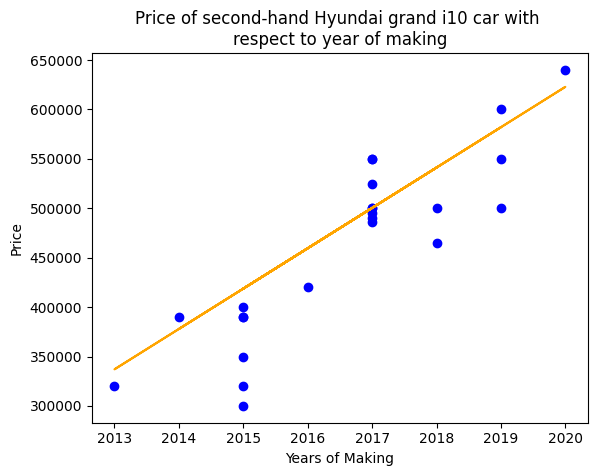

In [14]:
plt.scatter( X_test, y_test, color = 'blue' )

plt.plot( X_test, y_pred, color = 'orange' )

plt.title( '''Price of second-hand Hyundai grand i10 car with
respect to year of making''' )

plt.xlabel( 'Years of Making' )

plt.ylabel( 'Price' )

plt.show()

Price second hand at 2022

In [15]:
predicted_price = model.predict(np.array([[2022]]))
print('Predicted price at 2022:', predicted_price[0])

Predicted price at 2022: 704536.2326783836


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Lasso Regression model


In [16]:
lasso = Lasso(alpha=0.1)  # alpha is the regularization parameter
model= lasso.fit(X_train, y_train)

# Predicting on the test set, can replace model with lasso itself
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R_squared:", r2)

Mean Squared Error: 2360738206.8636756
R_squared: 0.7087664312933915


linear regression model works a bit better than lasso regression model